In [92]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
def get_model_summaries(predictions, actuals, labels, model_name):
    actuals = [labels[actual] for actual in np.argmax(actuals, axis = 1)]
    loss = log_loss(actuals, predictions)
    predictions = [labels[prediction] for prediction in np.argmax(predictions, axis = 1)]
    accuracy = accuracy_score(actuals, predictions)
    precision_weighted = precision_score(actuals, predictions, labels=labels, average='weighted')
    recall_weighted = recall_score(actuals, predictions, labels=labels, average='weighted')
    f1_weighted = f1_score(actuals, predictions, labels=labels, average='weighted')
    return [model_name, loss, accuracy, precision_weighted, recall_weighted, f1_weighted]

In [100]:
def model_evaluation(predictions, y, column_labels, label):
    y = [labels[actual] for actual in np.argmax(y, axis = 1)]
    #calculate loss
    loss = log_loss(y, predictions)
    print('{0} Loss: {1:.4f}'.format(label, loss))
    predictions = [labels[prediction] for prediction in np.argmax(predictions, axis = 1)]
    #calculate accuracy
    accuracy = accuracy_score(y, predictions)
    print('{0} Accuracy: {1:.4f}'.format(label, accuracy))
    #calculate precision
    precision_weighted = precision_score(y, predictions, labels=column_labels, average='weighted')
    print('{0} Precision - Weighted: {1:.4f}'.format(label, precision_weighted))
    #calculate recall
    recall_weighted = recall_score(y, predictions, labels=column_labels, average='weighted')
    print('{0} Recall - Weighted: {1:.4f}'.format(label, recall_weighted))
    #calculate f1
    f1_weighted = f1_score(y, predictions, labels=column_labels, average='weighted')
    print('{0} F1 - Weighted: {1:.4f}'.format(label, f1_weighted))    
    cm = confusion_matrix(y, predictions)
    cm = cm.astype('float') / cm.sum(axis=1)
    df_cm = pd.DataFrame(cm, index = column_labels, columns = column_labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, fmt='.3f', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [75]:
labels = pd.read_csv('train_w_poster_updated_genres.csv')['genre']
labels = sorted(labels.unique())
y_train = np.load('train_outcome_keras.npy')
y_test = np.load('test_outcome_keras.npy')

In [76]:
predictions = os.listdir('predictions/')
predictions = [prediction for prediction in predictions if np.load('predictions/' + prediction).shape[1]==8]

In [80]:
train_predictions = [prediction for prediction in predictions if 'test' not in prediction]
test_predictions = [prediction for prediction in predictions if 'test' in prediction]

In [94]:
train_scores = []
for prediction in train_predictions:
    prediction_matrix = np.load('predictions/' + prediction)
    train_scores.append(get_model_summaries(prediction_matrix, y_train, labels, prediction))
train_summary_df = pd.DataFrame(train_scores, columns  = ['model_name', 'loss', 'accuracy', 'precision', 'recall', 'f1'])

In [96]:
test_scores = []
for prediction in test_predictions:
    prediction_matrix = np.load('predictions/' + prediction)
    test_scores.append(get_model_summaries(prediction_matrix, y_test, labels, prediction))
test_summary_df = pd.DataFrame(test_scores, columns  = ['model_name', 'loss', 'accuracy', 'precision', 'recall', 'f1'])

In [97]:
train_summary_df

,model_name,loss,accuracy,precision,recall,f1
0,model_47_combined_train_predictions.npy,1.142122,0.564410,0.558174,0.564410,0.554444
1,model_48_train_predictions.npy,1.663048,0.345148,0.414806,0.345148,0.198251
2,model_49_image_train_predictions.npy,22.989266,0.334393,0.111818,0.334393,0.167594
3,model_50_image_train_predictions.npy,1.853908,0.334393,0.111818,0.334393,0.167594
4,model_51_metadata_train_predictions.npy,1.155935,0.560865,0.556345,0.560865,0.550554
5,model_52_combined_train_predictions.npy,1.179994,0.551088,0.545236,0.551088,0.538013
6,model_52_image_train_predictions.npy,1.853886,0.334393,0.111818,0.334393,0.167594
7,model_53_image_train_predictions.npy,1.757863,0.332193,0.145770,0.332193,0.177453
8,model_53_pretrained_train_predictions.npy,22.989266,0.334393,0.111818,0.334393,0.167594
9,model_54_image_train_predictions.npy,30.701604,0.111098,0.012343,0.111098,0.022217


In [98]:
test_summary_df

,model_name,loss,accuracy,precision,recall,f1
0,model_47_combined_test_predictions.npy,1.503333,0.451788,0.447104,0.451788,0.443845
1,model_48_test_predictions.npy,1.802223,0.341917,0.200591,0.341917,0.185148
2,model_49_image_test_predictions.npy,22.610793,0.345351,0.119267,0.345351,0.177302
3,model_50_image_test_predictions.npy,1.841366,0.345351,0.119267,0.345351,0.177302
4,model_51_metadata_test_predictions.npy,1.524408,0.444349,0.440032,0.444349,0.434043
5,model_52_combined_test_predictions.npy,1.492047,0.456938,0.445560,0.456938,0.442526
6,model_52_image_test_predictions.npy,1.841282,0.345351,0.119267,0.345351,0.177302
7,model_53_image_test_predictions.npy,1.796107,0.344492,0.154776,0.344492,0.189674
8,model_53_pretrained_test_predictions.npy,22.610793,0.345351,0.119267,0.345351,0.177302
9,model_54_image_test_predictions.npy,30.837565,0.107010,0.011451,0.107010,0.020688


In [99]:
chosen_models = ['model_52_combined', 'model_56_image', 'model_54_pretrained']

model_52_combined Loss: 1.4920
model_52_combined Accuracy: 0.4569
model_52_combined Precision - Weighted: 0.4456
model_52_combined Recall - Weighted: 0.4569
model_52_combined F1 - Weighted: 0.4425


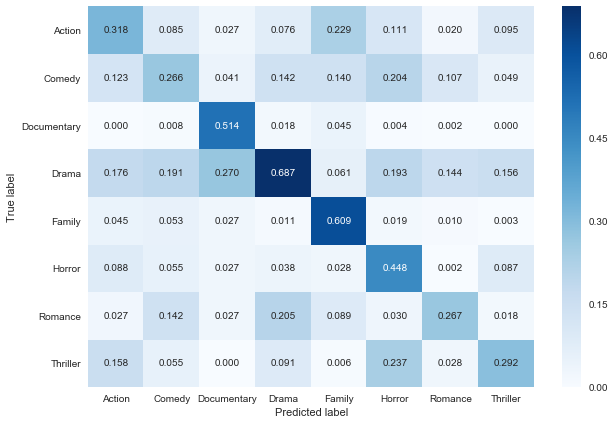

In [101]:
for model in chosen modeles:
    for i in 
    model_evaluation(np.load('predictions/' + 'model_52_combined_test_predictions.npy'),
                y_test, labels, 'model_52_combined')